<a href="https://colab.research.google.com/github/shand07/LR_PRACTICE_SPH/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load a dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Comparative Analysis of Regression Models/data.csv')



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Check data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [6]:

print("Shape of the dataset:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nDescription of Columns:")
print(df.describe(include='all'))


Shape of the dataset: (11914, 16)

Column Names and Data Types:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Description of Columns:
             Make           Model          Year  Engine Fuel Type  \
count       11914           11914  11914.000000             11911   
unique         48             915           NaN                10   
top     Chevrolet  Silverado 1500           NaN  regular unleaded   
freq         1123             156           NaN              7172   
mean          NaN             NaN   2010.384338               NaN   
std           NaN  

### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [7]:

missing_values = df.isnull().sum()
print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])



Columns with Missing Values:
Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [8]:

numerical_columns = df.select_dtypes(include=np.number)
summary_statistics = numerical_columns.describe()
print("\nSummary Statistics of Numerical Columns:")
print(summary_statistics)
print("\nMean:")
print(numerical_columns.mean())
print("\nMedian:")
print(numerical_columns.median())
print("\nMinimum:")
print(numerical_columns.min())
print("\nMaximum:")
print(numerical_columns.max())
print("\nStandard Deviation:")
print(numerical_columns.std())



Summary Statistics of Numerical Columns:
               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03 

### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

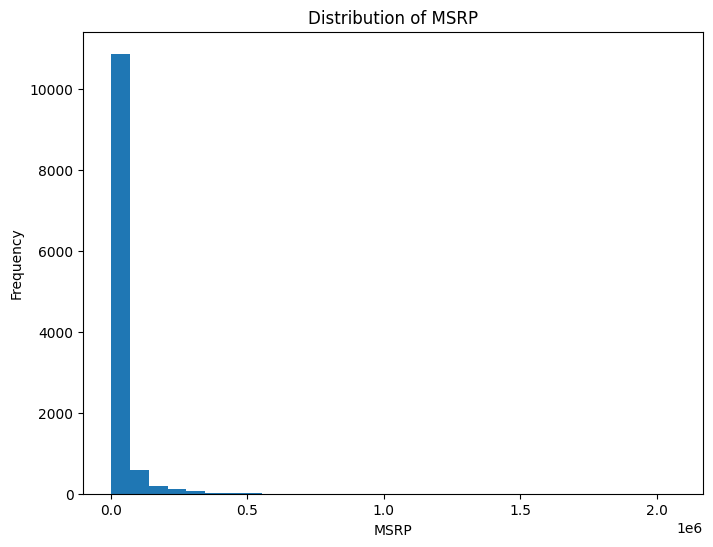

In [9]:

target_variable = 'MSRP'

if pd.api.types.is_numeric_dtype(df[target_variable]):
  plt.figure(figsize=(8, 6))
  plt.hist(df[target_variable], bins=30)
  plt.xlabel(target_variable)
  plt.ylabel('Frequency')
  plt.title('Distribution of {}'.format(target_variable))
  plt.show()
else:
  print("The target variable is not numerical.")




### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

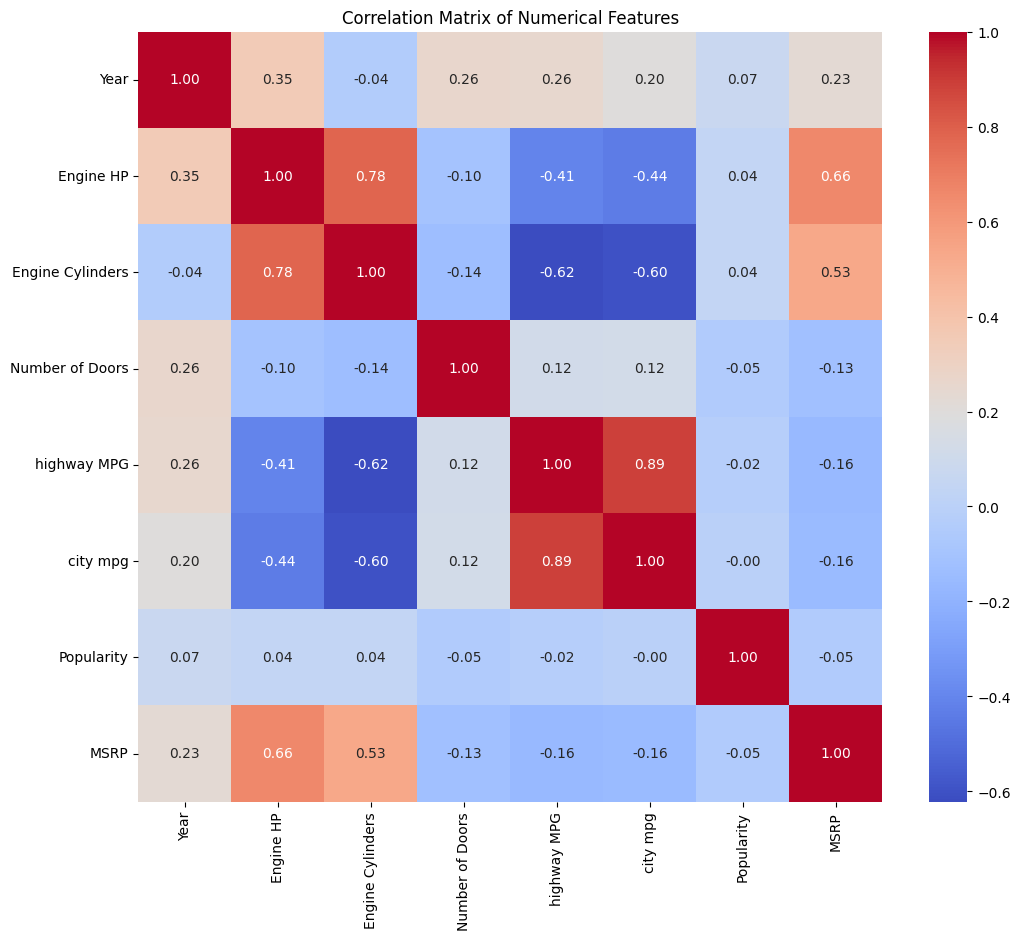


Highly Correlated Feature Pairs:
('Engine Cylinders', 'Engine HP')
('city mpg', 'highway MPG')

Correlation with Target Variable:
MSRP                1.000000
Engine HP           0.662008
Engine Cylinders    0.531312
Year                0.227590
Popularity         -0.048476
Number of Doors    -0.126635
city mpg           -0.157676
highway MPG        -0.160043
Name: MSRP, dtype: float64


In [10]:
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


correlated_features = set()
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > 0.7:
      colname_i = correlation_matrix.columns[i]
      colname_j = correlation_matrix.columns[j]
      correlated_features.add((colname_i, colname_j))

print("\nHighly Correlated Feature Pairs:")
for pair in correlated_features:
  print(pair)

correlation_with_target = numerical_columns.corr()[target_variable]
print("\nCorrelation with Target Variable:")
print(correlation_with_target.sort_values(ascending=False))


### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

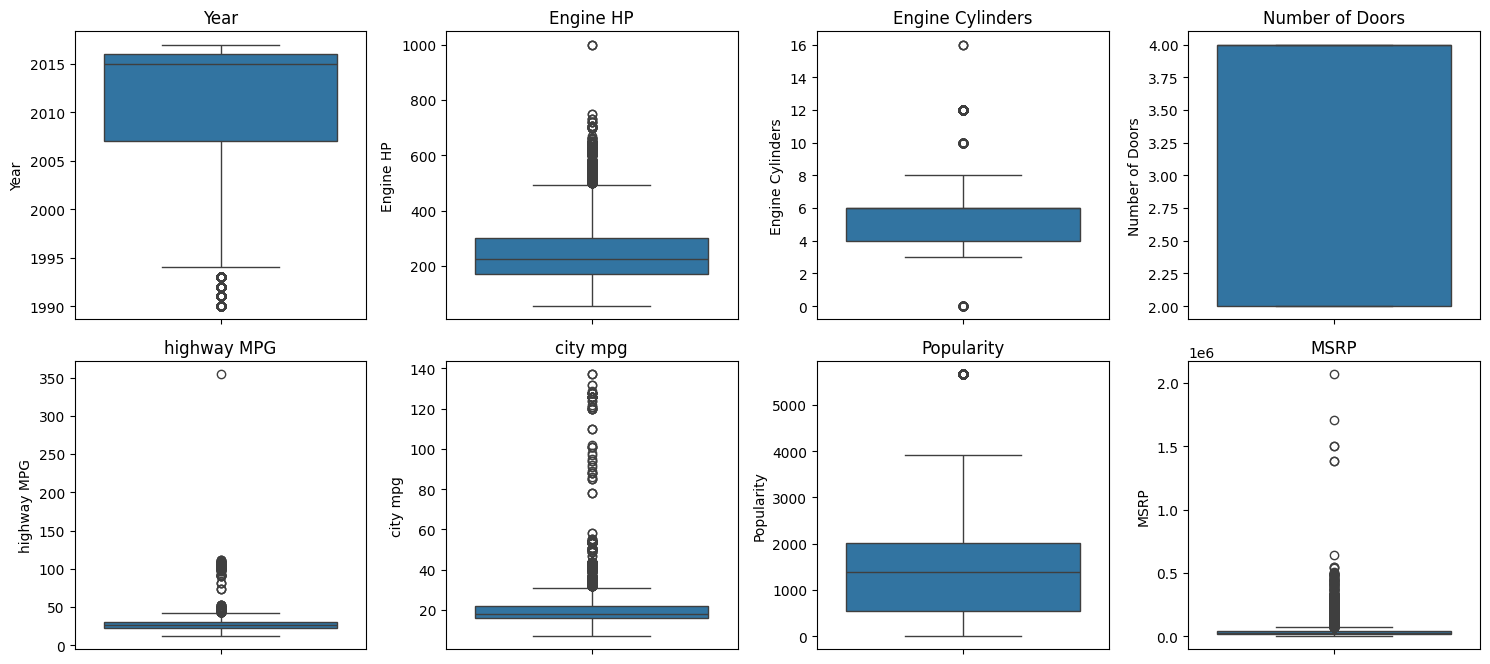

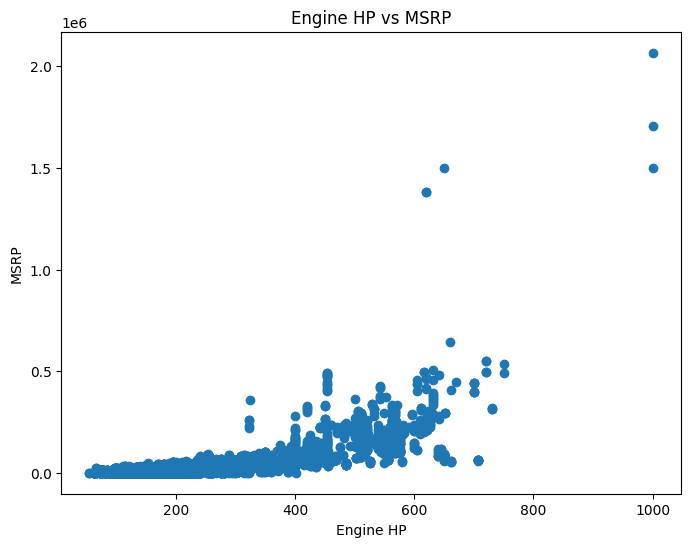

In [11]:


import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Engine HP'], df['MSRP'])
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Engine HP vs MSRP')
plt.show()

# Handling outliers:
# Remove outliers: You can remove rows with extreme values based on the boxplots or scatter plots.
# Transform outliers: You can apply transformations like log transformation to reduce the impact of outliers.
# Treat as missing values: You can replace outliers with NaN and then use imputation methods.

# The decision on how to handle outliers depends on the specific analysis and the context of the data.
# For example, if a few data points are significantly different from the rest and are likely due to errors, you might remove them.
# If the outliers represent actual extreme cases, you might want to keep them or transform them to avoid biasing the model.

# removing outliers based on IQR
Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Engine HP'] >= lower_bound) & (df['Engine HP'] <= upper_bound)]



### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [12]:

duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

# Remove duplicate rows if any
if len(duplicate_rows) > 0:
  df = df.drop_duplicates()
  print("Duplicate rows removed.")


Number of duplicate rows: 715
Duplicate rows removed.


### Split into features and target

In [13]:


X = df.drop('MSRP', axis=1)
y = df['MSRP']





### Feature Engineering

In [14]:
# Identify numerical and categorical columns
numerical_features = ['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']
categorical_features = ['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category', 'Vehicle Size','Vehicle Style']


### Preprocessing Pipelines

In [15]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [16]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [17]:

scaler = StandardScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1))


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [19]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0372
R² Score: 0.9709
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.1058
R² Score: 0.9173
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.8203
R² Score: 0.3590
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.5159
R² Score: 0.5968
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

In [ ]:
#Looking at the five models currently ran, it seems based of the R^2 score, Linear Regression performed the best.
#Also, the mean-squared-error is the lowest using the this model.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.